In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-data/zomato.csv
/kaggle/input/zomato-restaurants-data/file5.json
/kaggle/input/zomato-restaurants-data/file1.json
/kaggle/input/zomato-restaurants-data/file2.json
/kaggle/input/zomato-restaurants-data/file4.json
/kaggle/input/zomato-restaurants-data/file3.json
/kaggle/input/zomato-restaurants-data/Country-Code.xlsx


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Методы ближайших соседей 


**1. Подключитесь к набору данных. Разберитесь в том, как устроен датасет и какова постановка задачи.**

In [3]:
df = pd.read_csv("../input/zomato-restaurants-data/zomato.csv", encoding = "ISO-8859-1")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.describe().T# Статистика по числовым признакам

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Датасет состоит из данных ресторанов (названия, страны, города, рейтинга и тд). Target переменная - Aggregate rating. Цель - проанализировать данные и выяснить, от чего зависит рейтинг, как эти данные влияют на рейтинг

**2. Извлеките целевой признак (target). Какая из задач обучения с учителем рассматривается –– классификация или регрессия?**

In [6]:
df['Aggregate rating'].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

Так как target принимает конечное число значений, то задача обучения - классификация.

**3. Каково распределение значений target-переменной? Постройте подходящую визуализацию. Прокомментируйте результат.**


<AxesSubplot:>

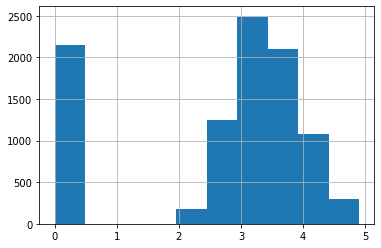

In [7]:
df['Aggregate rating'].hist()

Классы не сбалансированы

**4. Проведите необходимую предобработку данных (preprocessing).**

In [8]:
df["Country Code"].value_counts()

1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

In [9]:
df["Restaurant Name"].value_counts()

Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64

Уникальных названий ресторанов слишком много (7446). Они никак не влияют на рейтинг. "Address", "Locality", "Locality Verbose" аналогично.

In [10]:
df["City"].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

In [11]:
df["Cuisines"].value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

Так как уникальных наборов из типов кухонь слишком много, мы не сможем извлечь из взаимосвязь с рейтингом.

Так как у нас есть "Aggregate rating", что отображает информацию о рейтинге в числовых значениях, то "Rating color" не нужен.

In [12]:
df_num = df.drop(["Cuisines", "Restaurant Name", "Address", "Locality", "Locality Verbose", "Rating color", "City", "Currency",  "Restaurant ID"], axis = 1)#"Latitude", "Longitude",

In [13]:
df_num["Has Table booking"] = df_num["Has Table booking"].map({"Yes":1,"No":0})
df_num["Has Online delivery"] = df_num["Has Online delivery"].map({"Yes":1,"No":0})
df_num["Is delivering now"] = df_num["Is delivering now"].map({"Yes":1,"No":0})
df_num["Switch to order menu"] = df_num["Switch to order menu"].map({"Yes":1,"No":0})
df_num["Rating text"] = df_num["Rating text"].map({"Excellent":5, "Very Good":4 ,"Good":3, "Average":2, "Poor":1, "Not rated":0})

In [14]:
df_num.head()

,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
0,162,121.027535,14.565443,1100,1,0,0,0,3,4.8,5,314
1,162,121.014101,14.553708,1200,1,0,0,0,3,4.5,5,591
2,162,121.056831,14.581404,4000,1,0,0,0,4,4.4,4,270
3,162,121.056475,14.585318,1500,0,0,0,0,4,4.9,5,365
4,162,121.057508,14.584450,1500,1,0,0,0,4,4.8,5,229


In [15]:
df["Rating text"].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

In [16]:
# Импорт нужной функции
from sklearn.model_selection import train_test_split

# Создание X, y
# X --- вся таблица без таргета
# y --- таргет (целевая переменная)
y = df_num['Aggregate rating'] 
X = df_num.drop('Aggregate rating', axis=1) 

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Разделение
# test_size --- доля исходных данных, которую оставляем для валидации
# random_state --- произвольное целое число, для воспроизводимости случайных результатов

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=12)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()# обучаем классификации


In [18]:
# lab_enc = preprocessing.LabelEncoder()
# y_train = lab_enc.fit_transform(y_train)
# y_valid = lab_enc.fit_transform(y_valid)
knn.fit(X_train,y_train)


ValueError: Unknown label type: 'continuous'

In [ ]:
y_pred = knn.predict(X_valid) # делаем прогноз


In [ ]:
from sklearn.metrics import accuracy_score
#knn.score(X_valid, y_valid)
print('Качество модели:', accuracy_score(y_pred, y_valid))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_pred,y_valid))#Матрица ошибок 
print(accuracy_score(y_pred,y_valid))

# Настройка оптимального числа ближайших соседей в методе kNN 

**1. Создайте генератор разбиений, который перемешивает выборку перед создани ем блоков ( shuffle=True ). Число блоков n_splits равно 5. Задайте также параметр random_state для воспроизводимости результатов.Найдите показатель качества модели kNN на кросс-валидации. Подумайте, при емлемо ли использование вашей меры (метрики) качества в данной задаче? При необходимости пересчитайте качество с помощью другой метрики из списка.**


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lab_enc = preprocessing.LabelEncoder()
#X = lab_enc.fit_transform(X)
y = lab_enc.fit_transform(y)
scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
print('Массив значений метрики:', scores)

**2. Осуществите кросс-валидацию модели при числе соседей k ∈ [1;50]. Используй те GridSearchCV . При каком k качество получилось наилучшим? Чему равна эта оценка качества? Постройте график значений метрики в зависимости от k ( matplotlib.pyplot.plot() ).**


In [ ]:
from sklearn.model_selection import GridSearchCV

knn_params={'n_neighbors': np.arange(1, 50)}
knn_grid = GridSearchCV(knn,knn_params, scoring = 'accuracy', cv=kf)
knn_grid.fit(X_train, y_train)

In [ ]:
knn_grid.best_estimator_ # При количестве соседей равном 1 модель показала лучшие результаты

In [ ]:
knn_grid.best_params_ 

In [ ]:
knn_grid.best_score_

In [ ]:
pd.DataFrame(knn_grid.cv_results_)

In [ ]:
import matplotlib.pyplot as plt #Валидационная кривая

results_df = pd.DataFrame(knn_grid.cv_results_)
plt.plot(results_df['param_n_neighbors'], results_df['mean_test_score'])

plt.xlabel('Number of neighbors')
plt.ylabel('Test accuracy')
plt.title('Валидационная кривая')
plt.show()

# Выбор метрики в методе kNN 

**1.Переберите разные варианты значений параметра p по сетке от 1 до 10 с та ким шагом, чтобы всего было протестировано 200 вариантов (удобно использо вать функцию numpy.linspace ). Используйте KNeighborsClassifier или 
KNeighborsRegressor с оптимальным значением n_neighbors , найденным ранее. Задайте опцию weights='distance' –– данный параметр добавляет в алгоритм веса, зависящие от расстояния до ближайших соседей. В качестве метрики качества снова используйте accuracy . Качество оценивайте с помо щью кросс-валидации по 5 блокам.**

In [ ]:
p_params = {'p': np.linspace(1,10,200)}
knn = KNeighborsClassifier(n_neighbors=1, weights = 'distance', n_jobs = -1)
cv = GridSearchCV(knn, p_params, cv = kf, scoring='accuracy', verbose = 100)
cv.fit(X,y)

In [ ]:
cv_result = pd.DataFrame(cv.cv_results_)
plt.plot(cv_result["param_p"],cv_result["mean_test_score"])

**2. Определите, при каком p качество на кросс-валидации оказалось оптимальным. Обратите внимание, что cross_val_score возвращает массив показателей качества по блокам; необходимо максимизировать среднее этих показателей.**


In [ ]:
cv.best_estimator_

In [ ]:
cv.best_score_

In [ ]:
cv.best_params_

# Другие метрические методы 

**Поэкспериментируйте с другими метрическими методами для задач регрессии и классификации, представленными в библиотеке Scikit-learn:**
1. RadiusNeighborsClassifier
2. RadiusNeighborsRegressor
3. NearestCentroid.

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier
rnc = RadiusNeighborsClassifier(radius=10)
rnc.fit(X, y)
y_pred = rnc.predict(X_valid)
accuracy_score(y_valid, y_pred)

In [ ]:
from sklearn.neighbors import NearestCentroid
nc = NearestCentroid()
nc.fit(X_train, y_train)
y_pred = nc.predict(X_valid)
accuracy_score(y_valid, y_pred)